In [1]:
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns

In [2]:
pol_int = pd.read_csv("Political Interest.csv")

pol_interest_df = pd.DataFrame(pol_int)

In [3]:
pol_interest_df.head()

,gender,education_level,political_interest
0,1,1,38.0
1,1,1,39.0
2,1,1,35.0
3,1,1,38.0
4,1,1,41.0


In [4]:
pol_interest_df.tail()

,gender,education_level,political_interest
53,2,3,61.0
54,2,3,59.0
55,2,3,55.0
56,2,3,45.0
57,2,3,51.0


<h2> Assumption #4 </h2>

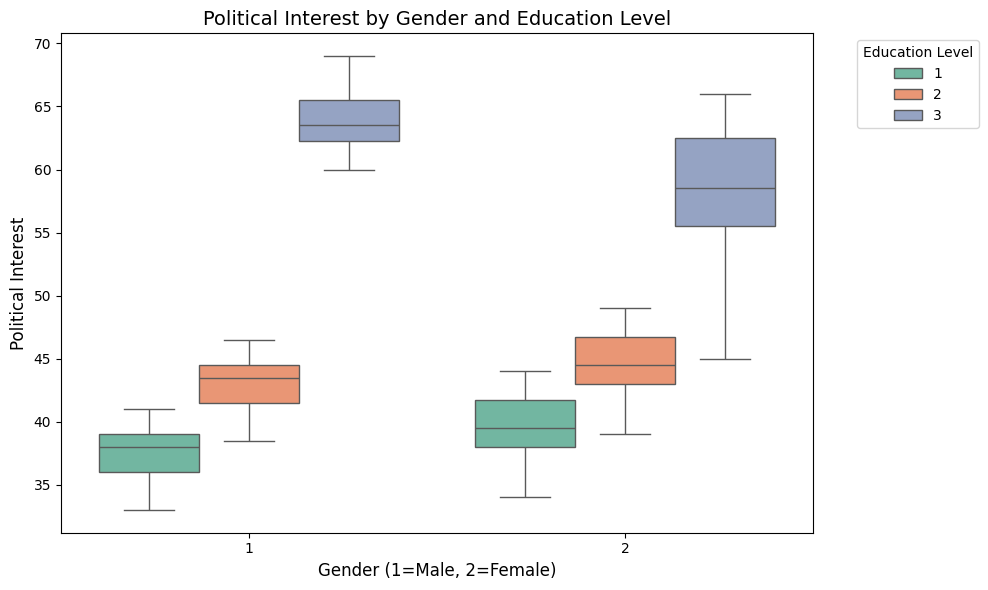

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.boxplot(x='gender', y='political_interest', hue='education_level', data=pol_interest_df, palette="Set2", dodge=True)

plt.title("Political Interest by Gender and Education Level", fontsize=14)
plt.xlabel("Gender (1=Male, 2=Female)", fontsize=12)
plt.ylabel("Political Interest", fontsize=12)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h2>Assumption #5 </h2>

In [38]:
from scipy import stats
import numpy as np
from IPython.display import display
def analyze_group_data(df, group_var, target_var):
    descriptive_measures = {}
    for group_name, group_data in df.groupby(group_var)[target_var]:
        n = group_data.count() 
        descriptive_measures[group_name] = {
            'Valid': n,
            'Mode': group_data.mode().tolist(),
            'Median': group_data.median(),
            'Mean': group_data.mean(),
            'Std. Deviation': group_data.std(),
            'Variance': group_data.var(),
            'Skewness': group_data.skew(),
            'Std. Error of Skewness': np.sqrt(((6) * n * (n - 1)) / ((n - 2) * (n + 1) * (n + 3))),
            'Kurtosis': group_data.kurt(),
            'Std. Error of Kurtosis': np.sqrt(24 / n),
            'Minimum': group_data.min(),
            'Maximum': group_data.max(),
            '25th Percentile': group_data.quantile(0.25),
            '50th Percentile': group_data.quantile(0.50),
            '90th Percentile': group_data.quantile(0.90),
        }
    return pd.DataFrame(descriptive_measures).T

<h4> For male:</h4>

In [37]:
male_data = pol_interest_df[pol_interest_df['gender'] == 1]
display(male_descriptive_stats)

,Valid,Mode,Median,Mean,Std. Deviation,Variance,Skewness,Std. Error of Skewness,Kurtosis,Std. Error of Kurtosis,Minimum,Maximum,25th Percentile,50th Percentile,90th Percentile
1,9,[38.0],38.0,37.444444,2.505549,6.277778,-0.406178,0.717137,-0.229775,1.632993,33.0,41.0,36.0,38.0,40.2
2,9,"[41.5, 44.5]",43.5,42.944444,2.337793,5.465278,-0.51367,0.717137,0.563027,1.632993,38.5,46.5,41.5,43.5,44.9
3,10,"[63.0, 64.0, 69.0]",63.5,64.1,3.071373,9.433333,0.630466,0.687043,-0.505099,1.549193,60.0,69.0,62.25,63.5,69.0


<h4> For female:</h4>

In [36]:
female_data = pol_interest_df[pol_interest_df['gender'] == 2]
display(female_descriptive_stats)

,Valid,Mode,Median,Mean,Std. Deviation,Variance,Skewness,Std. Error of Skewness,Kurtosis,Std. Error of Kurtosis,Minimum,Maximum,25th Percentile,50th Percentile,90th Percentile
1,10,"[38.0, 44.0]",39.5,39.6,3.272783,10.711111,-0.173061,0.687043,-0.627184,1.549193,34.0,44.0,38.0,39.5,44.0
2,10,"[43.0, 49.0]",44.5,44.6,3.272783,10.711111,-0.173061,0.687043,-0.627184,1.549193,39.0,49.0,43.0,44.5,49.0
3,10,"[45.0, 51.0, 55.0, 57.0, 58.0, 59.0, 61.0, 63....",58.5,58.0,6.463573,41.777778,-0.802369,0.687043,0.443492,1.549193,45.0,66.0,55.5,58.5,65.1


In [16]:
from IPython.display import display


normality ={}
for i in pol_interest_df['gender'].unique():
    for j in pol_interest_df['education_level'].unique():
        group_normal=pol_interest_df[(pol_interest_df['gender'] == i) & (pol_interest_df['education_level'] == j)]['political_interest']
        stat, p_value = shapiro(group_normal)
        normality[(int(i), int(j))] = {'Statistic': float(stat), 'p-value': float(p_value)}

display(normality)

{(1, 1): {'Statistic': 0.9813390134795488, 'p-value': 0.9708070387442351},
 (1, 2): {'Statistic': 0.9565019530188729, 'p-value': 0.7610940646763964},
 (1, 3): {'Statistic': 0.9153413250787927, 'p-value': 0.31973071050675683},
 (2, 1): {'Statistic': 0.9629531035675938, 'p-value': 0.8189494017694237},
 (2, 2): {'Statistic': 0.9629531035675938, 'p-value': 0.8189494017694237},
 (2, 3): {'Statistic': 0.9499896853336705, 'p-value': 0.6683785084587048}}

<h2> Assumption #6 </h2>

In [7]:
from scipy.stats import levene


group_levene = [pol_interest_df[(pol_interest_df['gender'] == i) & (pol_interest_df['education_level'] == j)]['political_interest']
          for i in pol_interest_df['gender'].unique() for j in pol_interest_df['education_level'].unique()]

levene_stat, levene_p = levene(*group_levene)
float(levene_stat), float(levene_p)
print(f"Statistic: {levene_stat} p-value: {levene_p}")

Statistic: 2.20536094868572 p-value: 0.06764955900365917


<h2> TWO WAY ANOVA </h2>

In [11]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
model = ols('political_interest ~ C(gender) * C(education_level)', data=pol_interest_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(gender),10.704737,1.0,0.744533,3.921748e-01
C(education_level),5409.958966,2.0,188.136131,1.553704e-24
C(gender):C(education_level),210.337661,2.0,7.314679,1.587744e-03
Residual,747.644444,52.0,NaN,NaN


<h3> POST HOC </h3>

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_education = pairwise_tukeyhsd(pol_interest_df['political_interest'], pol_interest_df['education_level'])

print(tukey_education.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   5.2368 0.0009  1.9571  8.5166   True
     1      3  22.4711    0.0 19.2326 25.7095   True
     2      3  17.2342    0.0 13.9957 20.4727   True
----------------------------------------------------


In [15]:
pol_interest_df['gender_education'] = pol_interest_df['gender'].astype(str) + "_" + pol_interest_df['education_level'].astype(str)

tukey_interaction = pairwise_tukeyhsd(pol_interest_df['political_interest'], pol_interest_df['gender_education'])

print(tukey_interaction.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1_1    1_2      5.5 0.0371  0.2116 10.7884   True
   1_1    1_3  26.6556    0.0  21.501 31.8101   True
   1_1    2_1   2.1556 0.8165  -2.999  7.3101  False
   1_1    2_2   7.1556 0.0019   2.001 12.3101   True
   1_1    2_3  20.5556    0.0  15.401 25.7101   True
   1_2    1_3  21.1556    0.0  16.001 26.3101   True
   1_2    2_1  -3.3444 0.4021  -8.499  1.8101  False
   1_2    2_2   1.6556 0.9312  -3.499  6.8101  False
   1_2    2_3  15.0556    0.0   9.901 20.2101   True
   1_3    2_1    -24.5    0.0 -29.517 -19.483   True
   1_3    2_2    -19.5    0.0 -24.517 -14.483   True
   1_3    2_3     -6.1 0.0089 -11.117  -1.083   True
   2_1    2_2      5.0 0.0513  -0.017  10.017  False
   2_1    2_3     18.4    0.0  13.383  23.417   True
   2_2    2_3     13.4    0.0   8.383  18.417   True
----------------------------------------------